Mean Squared Error: 34.67561527839806


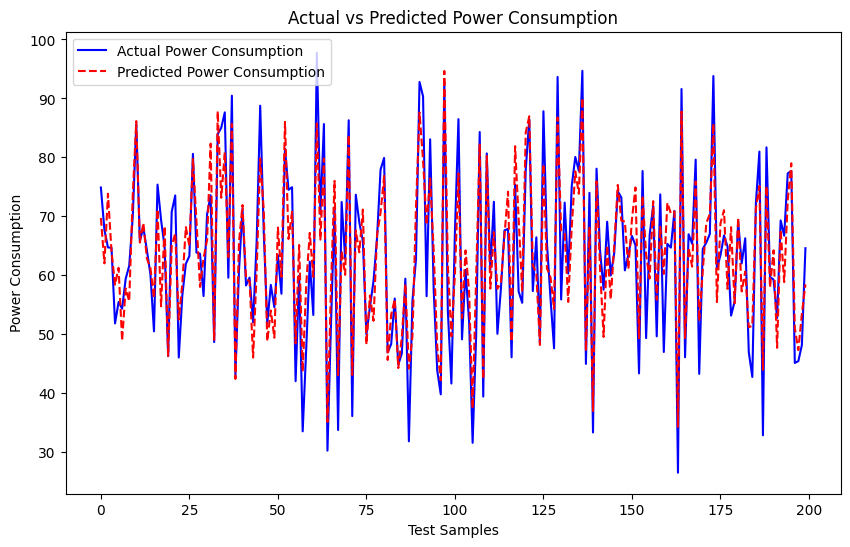

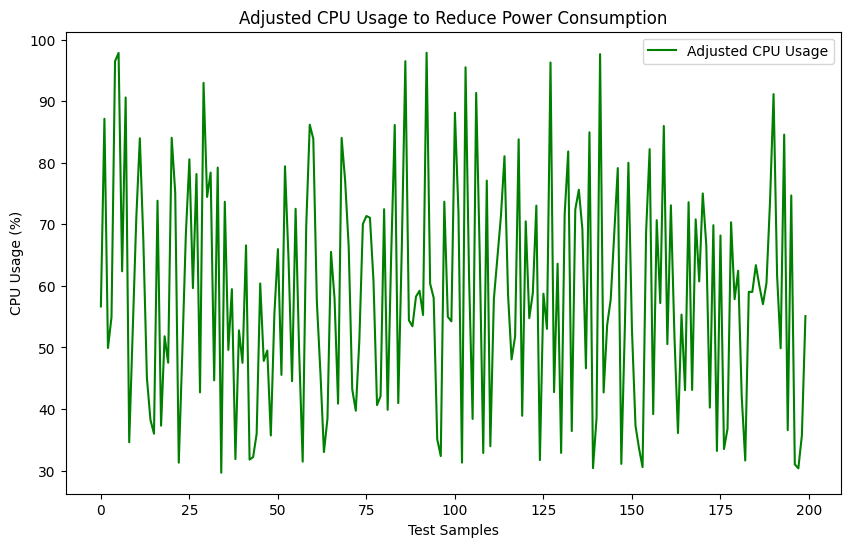

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Simulating Data (System Parameters: CPU Usage, GPU Usage, RAM Usage, etc.)
np.random.seed(42)

# Simulating 1000 data points
cpu_usage = np.random.uniform(30, 100, 1000)  # CPU usage in percentage
gpu_usage = np.random.uniform(30, 100, 1000)  # GPU usage in percentage
ram_usage = np.random.uniform(30, 100, 1000)  # RAM usage in percentage
power_consumption = cpu_usage * 0.3 + gpu_usage * 0.5 + ram_usage * 0.2 + np.random.normal(0, 5, 1000)  # Synthetic power consumption

# Creating DataFrame
data = pd.DataFrame({
    'cpu_usage': cpu_usage,
    'gpu_usage': gpu_usage,
    'ram_usage': ram_usage,
    'power_consumption': power_consumption
})

# Step 2: Train a Machine Learning Model to Predict Power Consumption
X = data[['cpu_usage', 'gpu_usage', 'ram_usage']]  # Features
y = data['power_consumption']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 3: Predict Power Consumption and Evaluate the Model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizing the actual vs predicted power consumption
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Power Consumption', color='blue')
plt.plot(y_pred, label='Predicted Power Consumption', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Power Consumption')
plt.xlabel('Test Samples')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Step 4: Dynamic Adjustment (Simulating Power Reduction)
# If the predicted power usage is above a certain threshold, we can reduce resources.
threshold = 70  # Threshold for power consumption (in arbitrary units)

# Ensure adjustment is made to the test data predictions, not the full data
adjusted_cpu_usage = np.where(y_pred > threshold, X_test['cpu_usage'] * 0.8, X_test['cpu_usage'])  # Adjust CPU usage based on predicted power consumption

# Display the adjusted CPU usage
plt.figure(figsize=(10, 6))
plt.plot(adjusted_cpu_usage, label='Adjusted CPU Usage', color='green')
plt.title('Adjusted CPU Usage to Reduce Power Consumption')
plt.xlabel('Test Samples')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.show()
